В этой аттестационной работе вам необходимо продемонстрировать умение применять
Keras для решения задачи классификации изображений. Вы будете использовать
известный датасет MNIST и создадите несколько моделей нейронных сетей для
классификации цифр. Ваша задача — пройти весь путь от загрузки и предобработки
данных до обучения моделей и оценки их качества.

* Задание:
    1. Загрузка и предобработка данных:
        * Загрузите датасет MNIST. Скачать датасет можно здесь (https://www.kaggle.com/datasets/hojjatk/mnist-dataset) , либо использовать встроенный загрузчик в Keras
        * Выполните нормализацию данных.
    2. Создание моделей:
        * Создайте три различные архитектуры моделей:
            1. Модель 1:
                * Один скрытый слой с 128 нейронами и функцией активации ReLU.
                * Выходной слой с 10 нейронами и функцией активации softmax.
            2. Модель 2:
                * Два скрытых слоя с 128 и 64 нейронами соответственно, с функцией активации ReLU.
                * Выходной слой с 10 нейронами и функцией активации softmax.
            3. Модель 3:
                * Два скрытых слоя с 256 и 128 нейронами соответственно, с функцией активации ReLU.
                * Выходной слой с 10 нейронами и функцией активации softmax.
    3. Компиляция моделей:
        * Компилируйте каждую модель, используя оптимизатор Adam, функцию потерь sparse_categorical_crossentropy и метрику accuracy.
    4. Обучение моделей:
        * Обучите каждую модель на тренировочном наборе данных с использованием обратного вызова EarlyStopping.
        * Используйте 20% данных для валидации.
        * Отобразите графики потерь и точности для тренировочных и валидационных данных.
    5. Оценка моделей:
        * Оцените качество каждой модели на тестовом наборе данных.
        * Включите метрики точности и ROC AUC.
    6. Сравнение моделей:
        * Сравните результаты всех построенных моделей.
    7. Сохранение и загрузка модели:
        * Сохраните обученные модели в файлы.
        * Загрузите модели из файлов и выполните предсказания для тестового набора данных.
    8. Визуализация предсказаний:
        * Постройте матрицы ошибок для предсказаний на тестовом наборе данных.
        * Визуализируйте несколько предсказанных изображений вместе с их истинными метками и предсказанными метками.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print("Загруженные данные:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Загруженные данные:
X_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
X_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


In [40]:

model1 = Sequential()
model1.add(Input(shape=(28, 28, 1)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model2 = Sequential()
model2.add(Input(shape=(28, 28, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model3 = Sequential()
model3.add(Input(shape=(28, 28, 1)))
model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [41]:
optimizer = 'adam'
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']

model1.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model2.compile(optimizer=optimizer, loss=loss, metrics=metrics)
model3.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [42]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])
history3 = model3.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping])


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8612 - loss: 0.4827 - val_accuracy: 0.9548 - val_loss: 0.1559
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9610 - loss: 0.1334 - val_accuracy: 0.9647 - val_loss: 0.1215
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9728 - loss: 0.0916 - val_accuracy: 0.9697 - val_loss: 0.1043
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9813 - loss: 0.0635 - val_accuracy: 0.9681 - val_loss: 0.1090
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9850 - loss: 0.0497 - val_accuracy: 0.9731 - val_loss: 0.0904
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9878 - loss: 0.0396 - val_accuracy: 0.9726 - val_loss: 0.0892
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9754 - val_loss: 0.0872
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9930 - loss: 0.0242 - 

In [43]:
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
print(f"Модель 1 - Тестовая точность: {test_accuracy1:.4f}")

test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test)
print(f"Модель 2 - Тестовая точность: {test_accuracy2:.4f}")

test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test)
print(f"Модель 3 - Тестовая точность: {test_accuracy3:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.9718 - loss: 0.0955
Модель 1 - Тестовая точность: 0.9745
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9459 - loss: 0.1772
Модель 2 - Тестовая точность: 0.9523
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9606 - loss: 0.1268
Модель 3 - Тестовая точность: 0.9647


In [45]:
results = {
    "Model": ["Model 1", "Model 2", "Model 3"],
    "Test Accuracy": [test_accuracy1, test_accuracy2, test_accuracy3]
}

results_df = pd.DataFrame(results)
print(results_df)

     Model  Test Accuracy
0  Model 1         0.9745
1  Model 2         0.9523
2  Model 3         0.9647


In [46]:
model1.save("model1.keras")
model2.save("model2.keras")
model3.save("model3.keras")

loaded_model1 = load_model("model1.keras")
loaded_model2 = load_model("model2.keras")
loaded_model3 = load_model("model3.keras")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


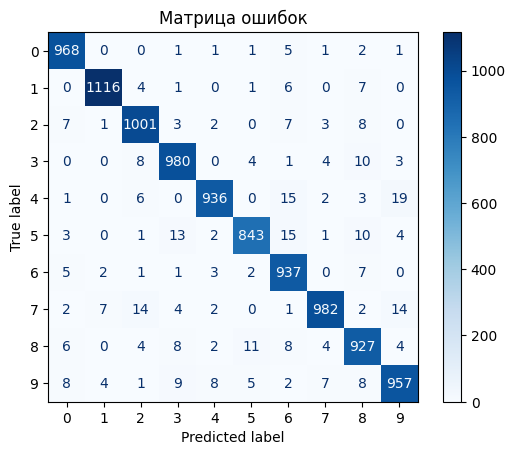

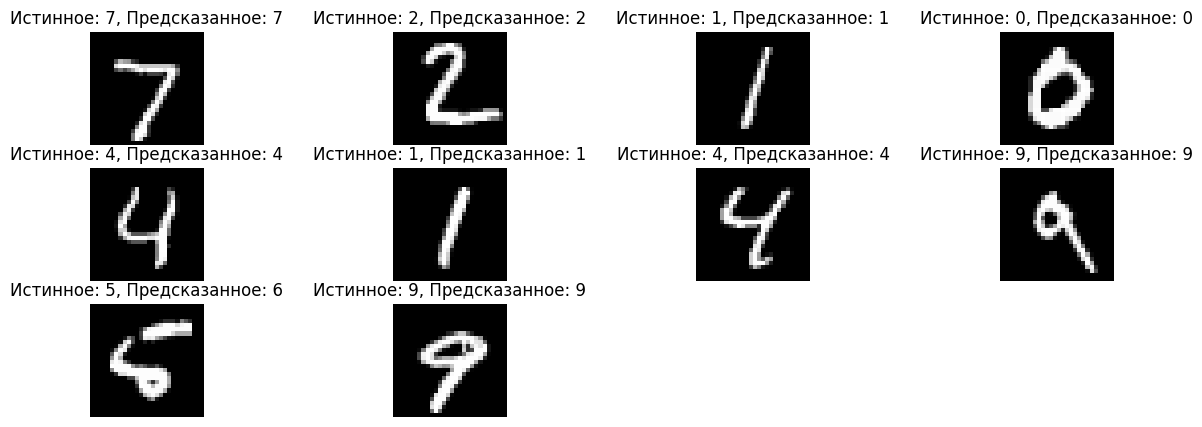

In [65]:


y_pred = np.argmax(model3.predict(X_test), axis=1)

if y_test.ndim > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

conf_matrix = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Матрица ошибок')
plt.show()

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Истинное: {y_true[i]}, Предсказанное: {y_pred[i]}')
    plt.axis('off')
plt.show()